# CNN from Scratch Tutorial

This notebook demonstrates our **NumPy-only CNN** implementation.

## What You'll Learn
1. Loading and visualizing MNIST data
2. Building and training a CNN from scratch
3. Evaluating model performance
4. Visualizing feature maps and filters


In [10]:
# Setup
import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]


## 1. Load MNIST Data


In [11]:
from src.utils import load_mnist

# Load MNIST (using small subset for faster training)
X_train, y_train, X_test, y_test = load_mnist(
    '../mnist_dataset',
    subset_size=(5000, 1000)  # 5000 train, 1000 test
)

print(f"Training data: {X_train.shape}")
print(f"Test data: {X_test.shape}")


Loaded MNIST: 5000 training, 1000 test samples
Image shape: (1, 28, 28) (channels, height, width)
Training data: (5000, 1, 28, 28)
Test data: (1000, 1, 28, 28)


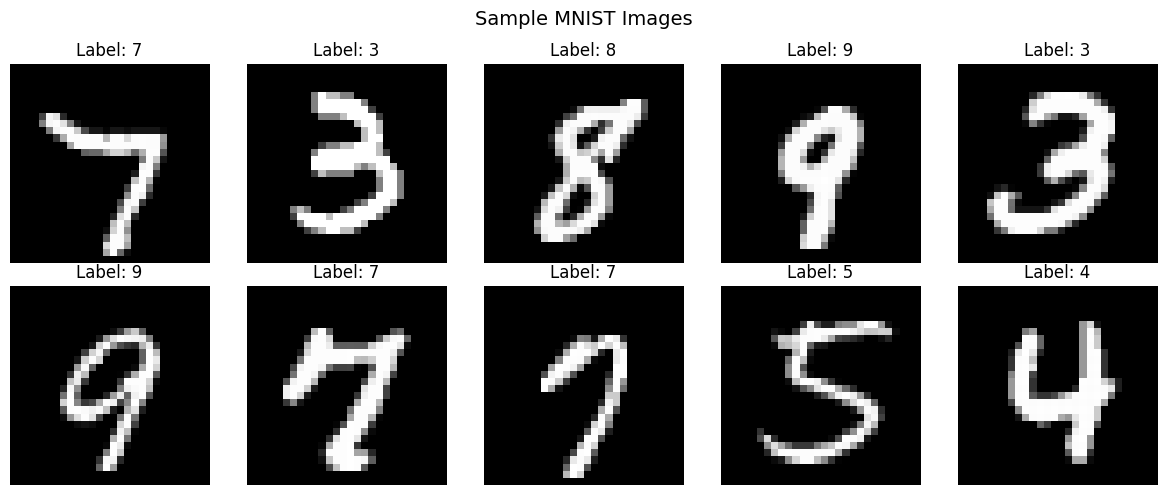

In [12]:
# Visualize samples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i, 0], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.suptitle('Sample MNIST Images', fontsize=14)
plt.tight_layout()
plt.show()


## 2. Create CNN Model


In [13]:
from src.cnn import CNN

# Create model
model = CNN(
    input_shape=(1, 28, 28),
    num_classes=10,
    use_batchnorm=True,
    dropout_rate=0.25
)

# Print summary
model.summary()



CNN Model Summary
Input shape: (1, 28, 28)
Output classes: 10
----------------------------------------------------------------------
  0. Conv2D(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same) Params: 320
  1. BatchNorm2D(32)                               Params: 64
  2. Activation(relu)                              Params: 0
  3. Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same) Params: 9,248
  4. BatchNorm2D(32)                               Params: 64
  5. Activation(relu)                              Params: 0
  6. MaxPool2D(pool_size=(2, 2), stride=(2, 2))    Params: 0
  7. Dropout2D(rate=0.25)                          Params: 0
  8. Conv2D(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same) Params: 18,496
  9. BatchNorm2D(64)                               Params: 128
 10. Activation(relu)                              Params: 0
 11. Conv2D(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same) Params: 36,928
 12. BatchNorm2D(64)                       

468458

## 3. Train the Model


In [14]:
# Train (reduce epochs for faster demo)
history = model.fit(
    X_train, y_train,
    epochs=5,  # Increase for better accuracy
    batch_size=32,
    learning_rate=0.001,
    optimizer='adam',
    validation_data=(X_test, y_test),
    verbose=True
)


Epoch 1/5: 100%|██████████| 157/157 [00:57<00:00,  2.75it/s, loss=0.7852, acc=0.7518]


Epoch 1/5 - Loss: 0.7852 - Acc: 0.7518 - Val Loss: 0.1727 - Val Acc: 0.9560 - LR: 0.001000


Epoch 2/5: 100%|██████████| 157/157 [00:56<00:00,  2.77it/s, loss=0.2983, acc=0.9164]


Epoch 2/5 - Loss: 0.2983 - Acc: 0.9164 - Val Loss: 0.0951 - Val Acc: 0.9750 - LR: 0.001000


Epoch 3/5: 100%|██████████| 157/157 [00:54<00:00,  2.90it/s, loss=0.1993, acc=0.9446]


Epoch 3/5 - Loss: 0.1993 - Acc: 0.9446 - Val Loss: 0.0752 - Val Acc: 0.9750 - LR: 0.001000


Epoch 4/5: 100%|██████████| 157/157 [01:31<00:00,  1.72it/s, loss=0.1704, acc=0.9496]


Epoch 4/5 - Loss: 0.1704 - Acc: 0.9496 - Val Loss: 0.0733 - Val Acc: 0.9760 - LR: 0.001000


Epoch 5/5: 100%|██████████| 157/157 [01:12<00:00,  2.16it/s, loss=0.1308, acc=0.9604]


Epoch 5/5 - Loss: 0.1308 - Acc: 0.9604 - Val Loss: 0.0626 - Val Acc: 0.9750 - LR: 0.001000


Training history plot saved to ../visualizations/training_curves.png


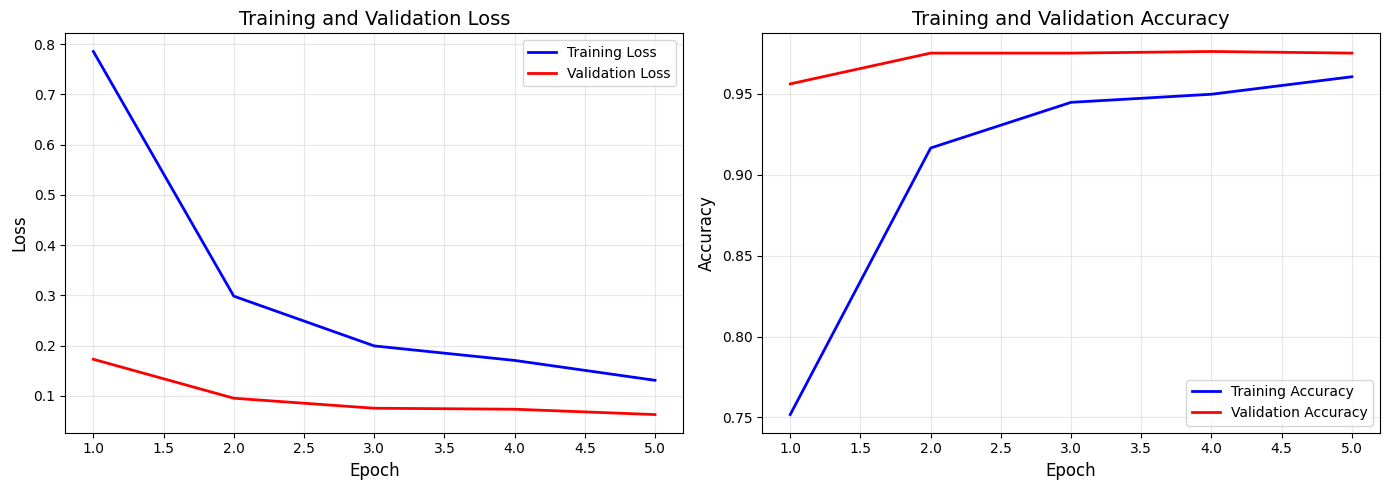

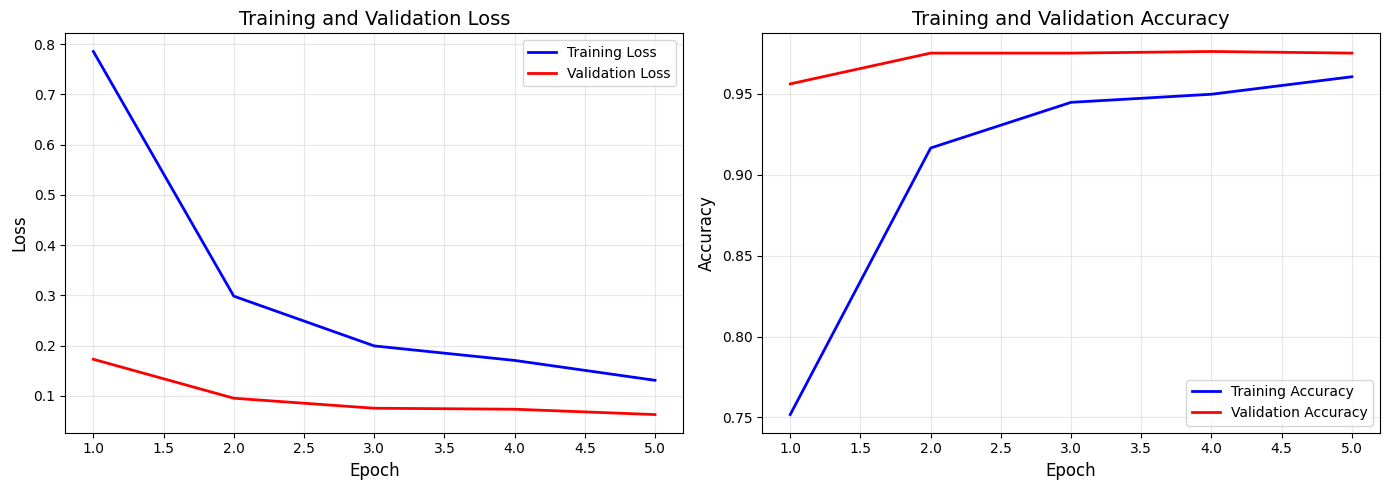

In [17]:
# Plot training history
from src.visualizations import plot_training_history
plot_training_history(history, save_path='../visualizations/training_curves.png')


## 4. Evaluate


In [18]:
# Final evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✓ Test Loss: {test_loss:.4f}")
print(f"✓ Test Accuracy: {test_acc:.2%}")



✓ Test Loss: 0.0626
✓ Test Accuracy: 97.50%


### 4.2 Confusion Matrix


Confusion matrix saved to ../visualizations/confusion_matrix.png


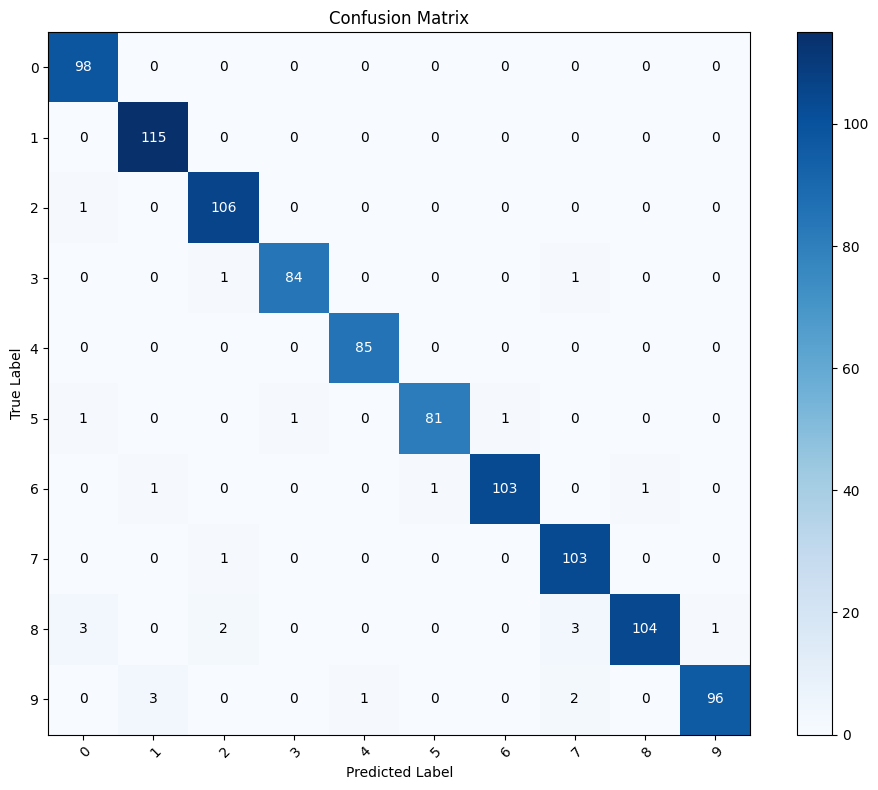

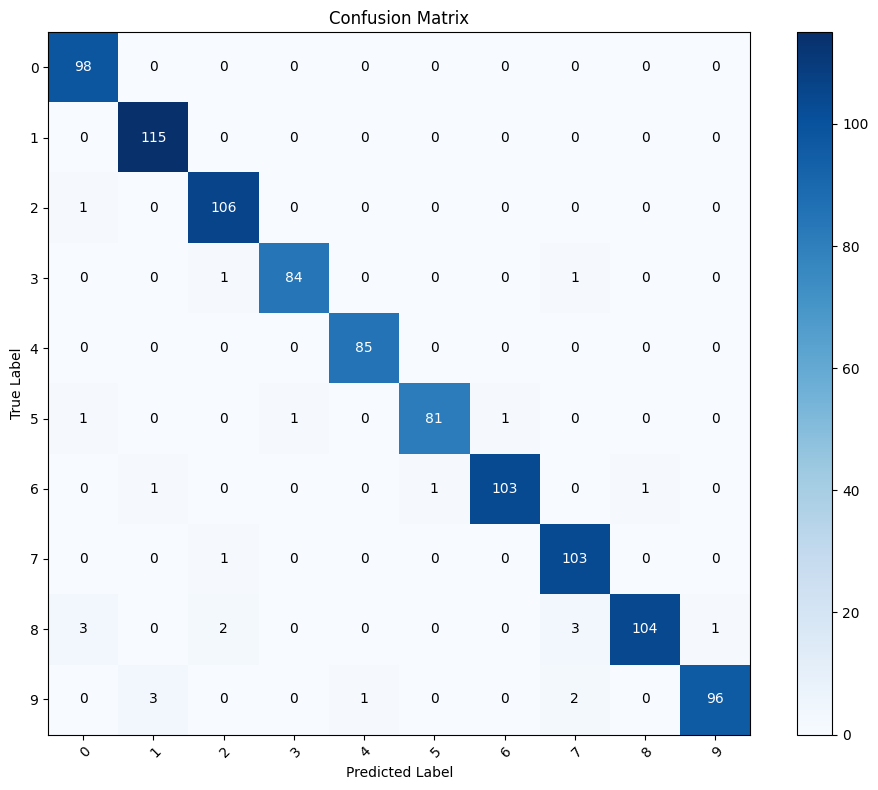

In [19]:
from src.visualizations import visualize_confusion_matrix
import numpy as np

# Get predictions
y_pred = model.predict_classes(X_test)

# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize
visualize_confusion_matrix(cm, class_names=[str(i) for i in range(10)], save_path='../visualizations/confusion_matrix.png')


### 4.3 Sample Predictions


Sample predictions saved to ../visualizations/sample_predictions.png


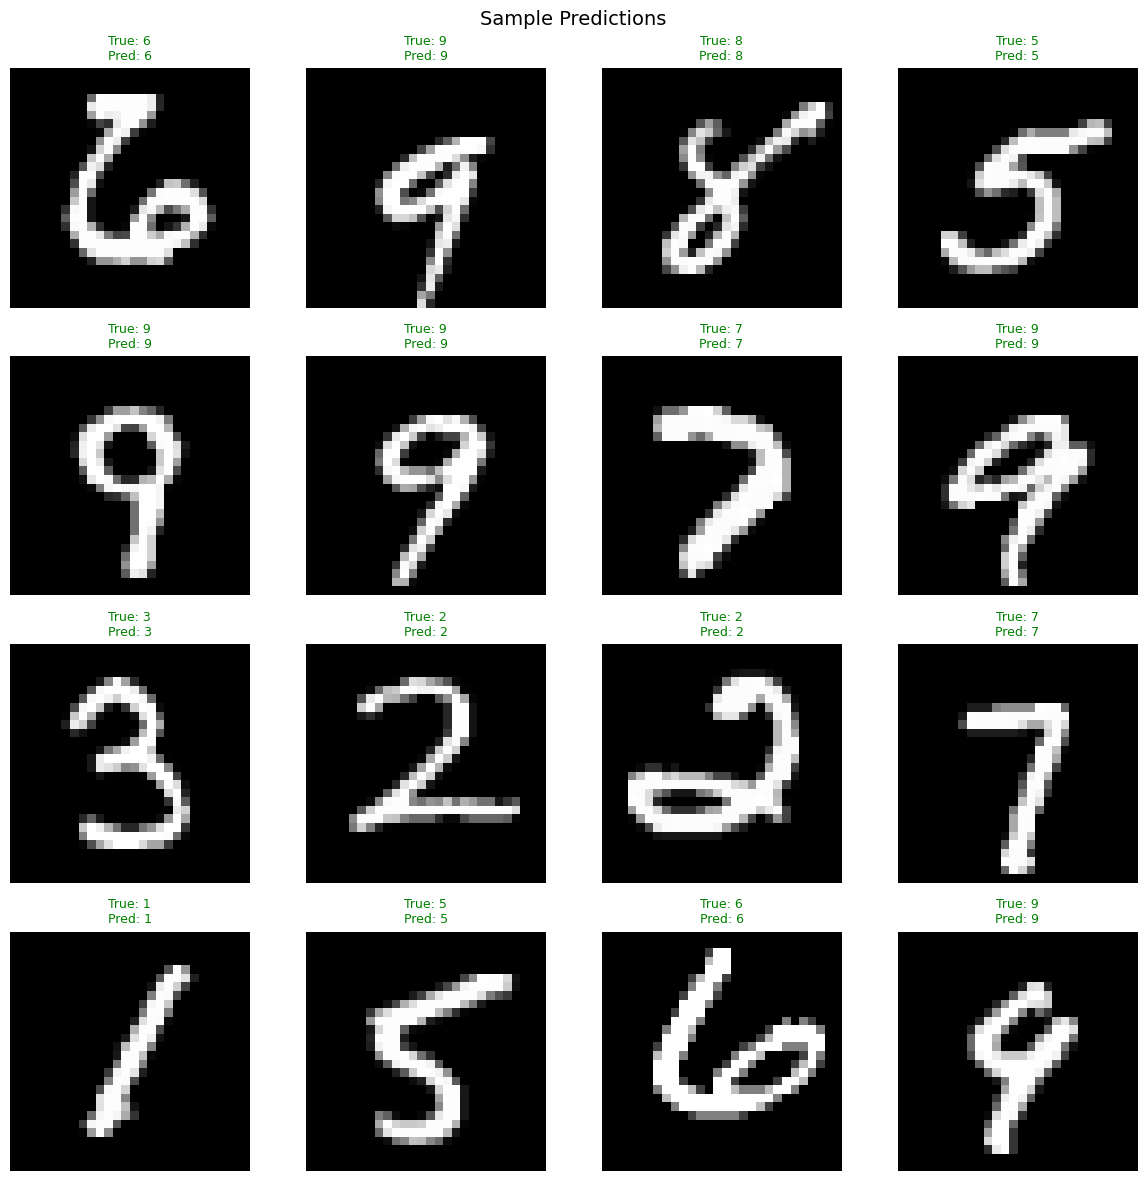

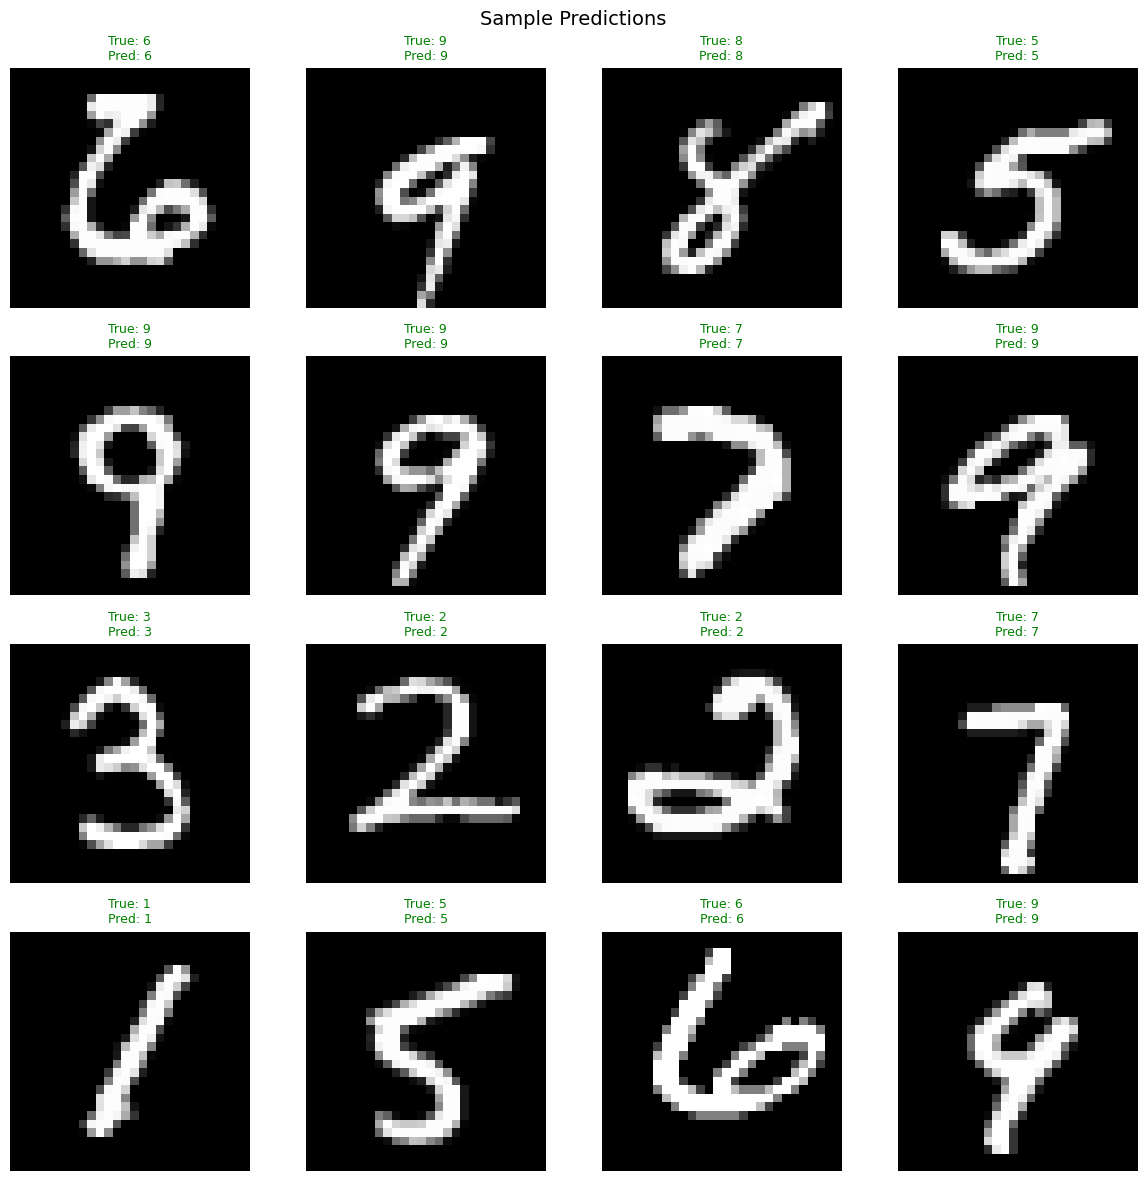

In [20]:
from src.visualizations import plot_sample_predictions

# Show some sample predictions
plot_sample_predictions(
    X_test[:16],
    y_test[:16],
    y_pred[:16],
    class_names=[str(i) for i in range(10)],
    save_path='../visualizations/sample_predictions.png'
)


## 5. Visualizations

### 5.1 Convolutional Filters


First layer filters shape: (32, 1, 3, 3)
Filters visualization saved to ../visualizations/conv_filters.png


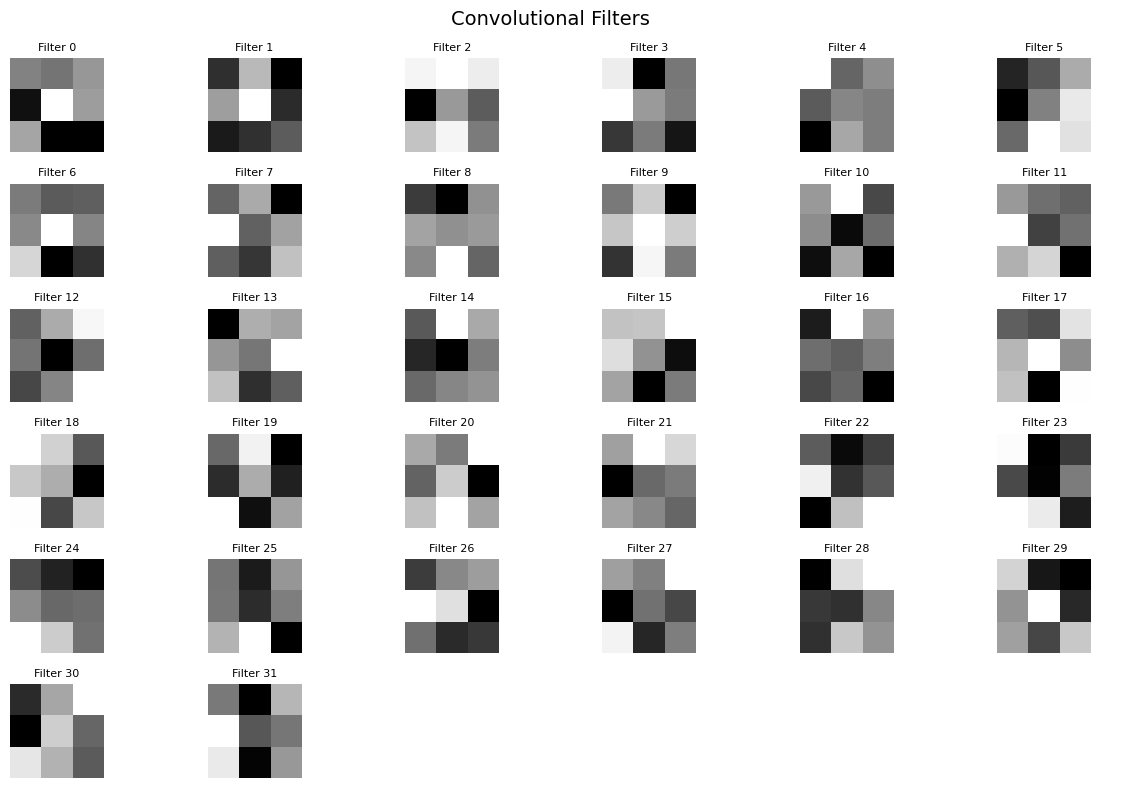

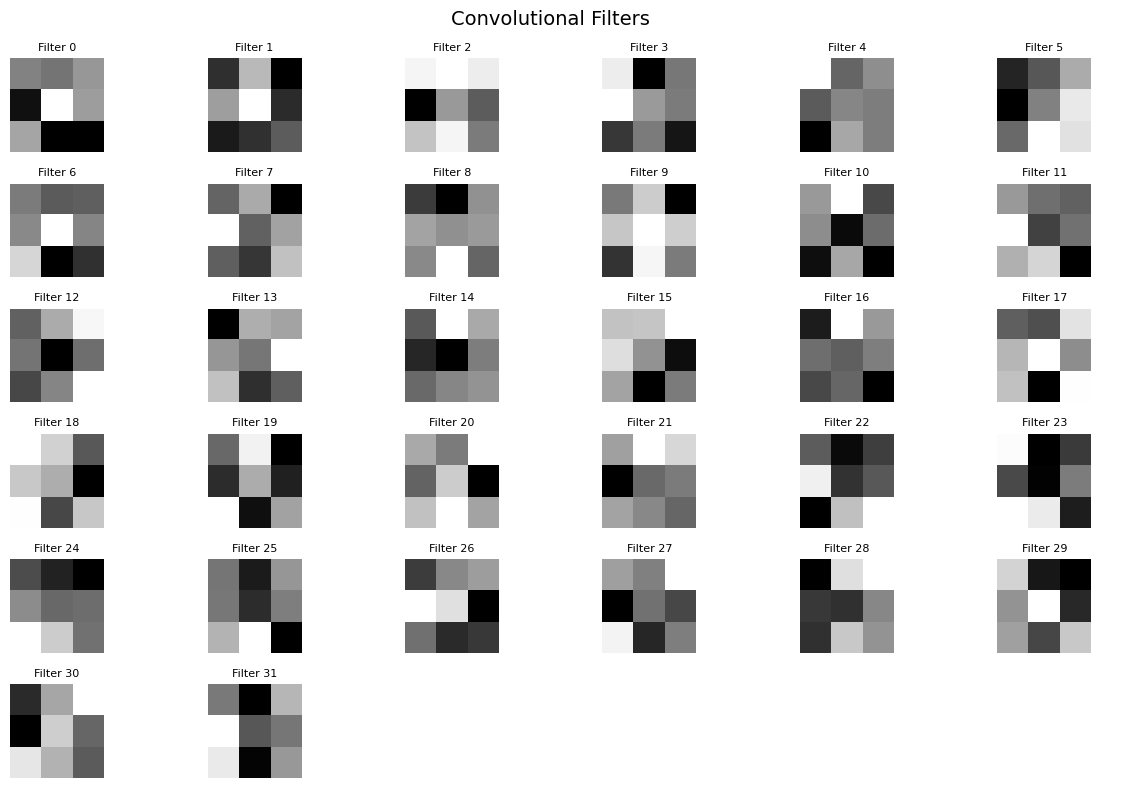

In [21]:
from src.visualizations import visualize_filters

# Get and visualize first layer filters
filters = model.get_filters()
print(f"First layer filters shape: {filters[0]['weights'].shape}")
visualize_filters(filters[0]['weights'], max_filters=32, save_path='../visualizations/conv_filters.png')


### 5.2 Feature Maps


Number of conv layers: 4
First layer feature map shape: (1, 32, 28, 28)
Feature maps saved to ../visualizations/feature_maps.png


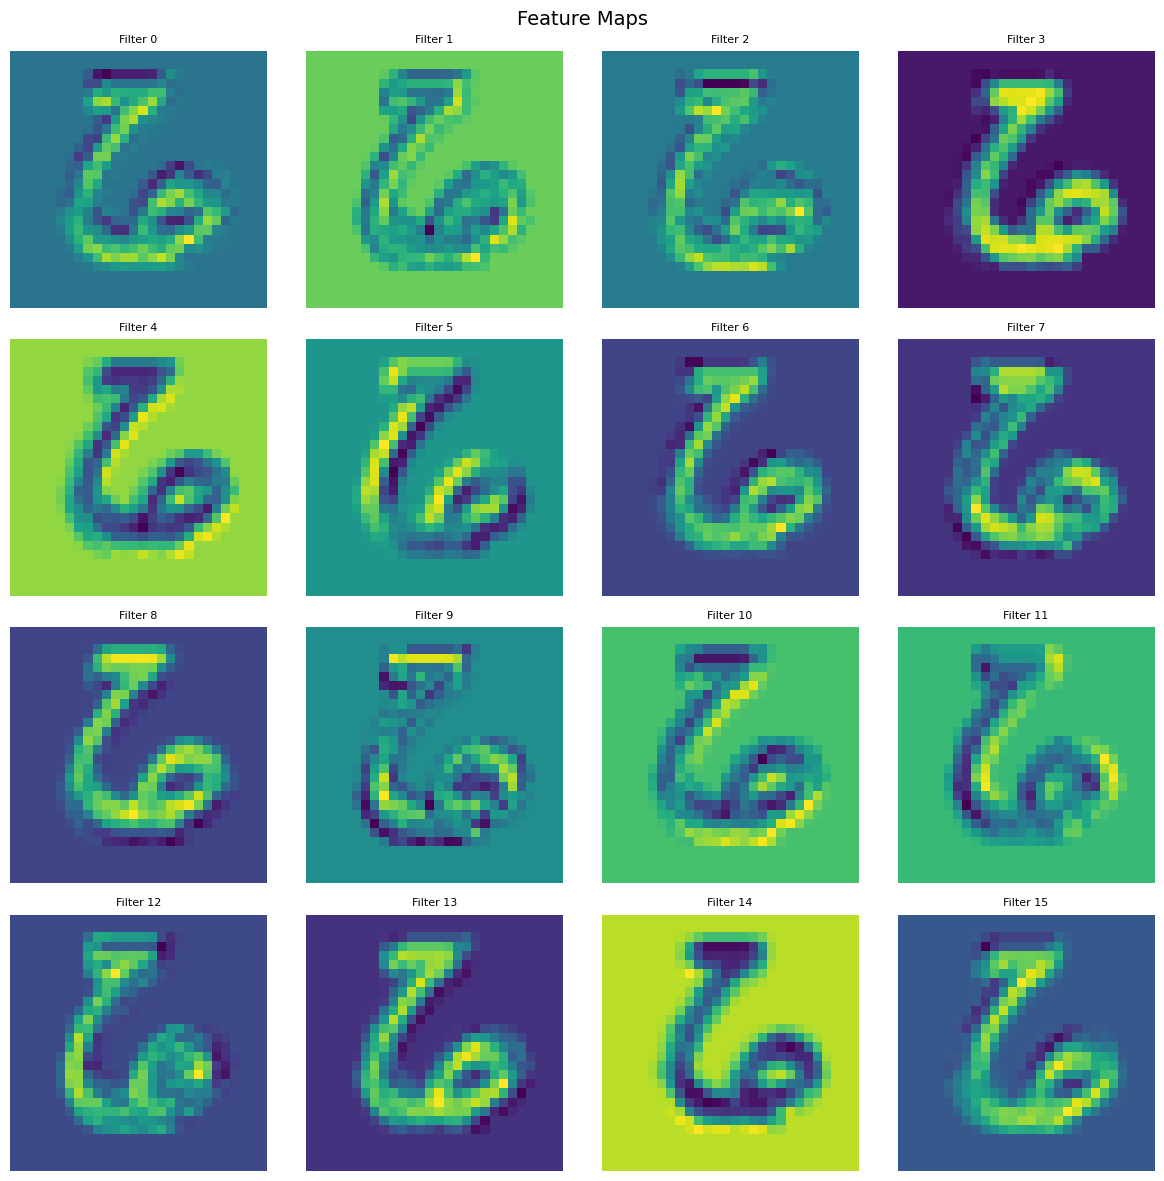

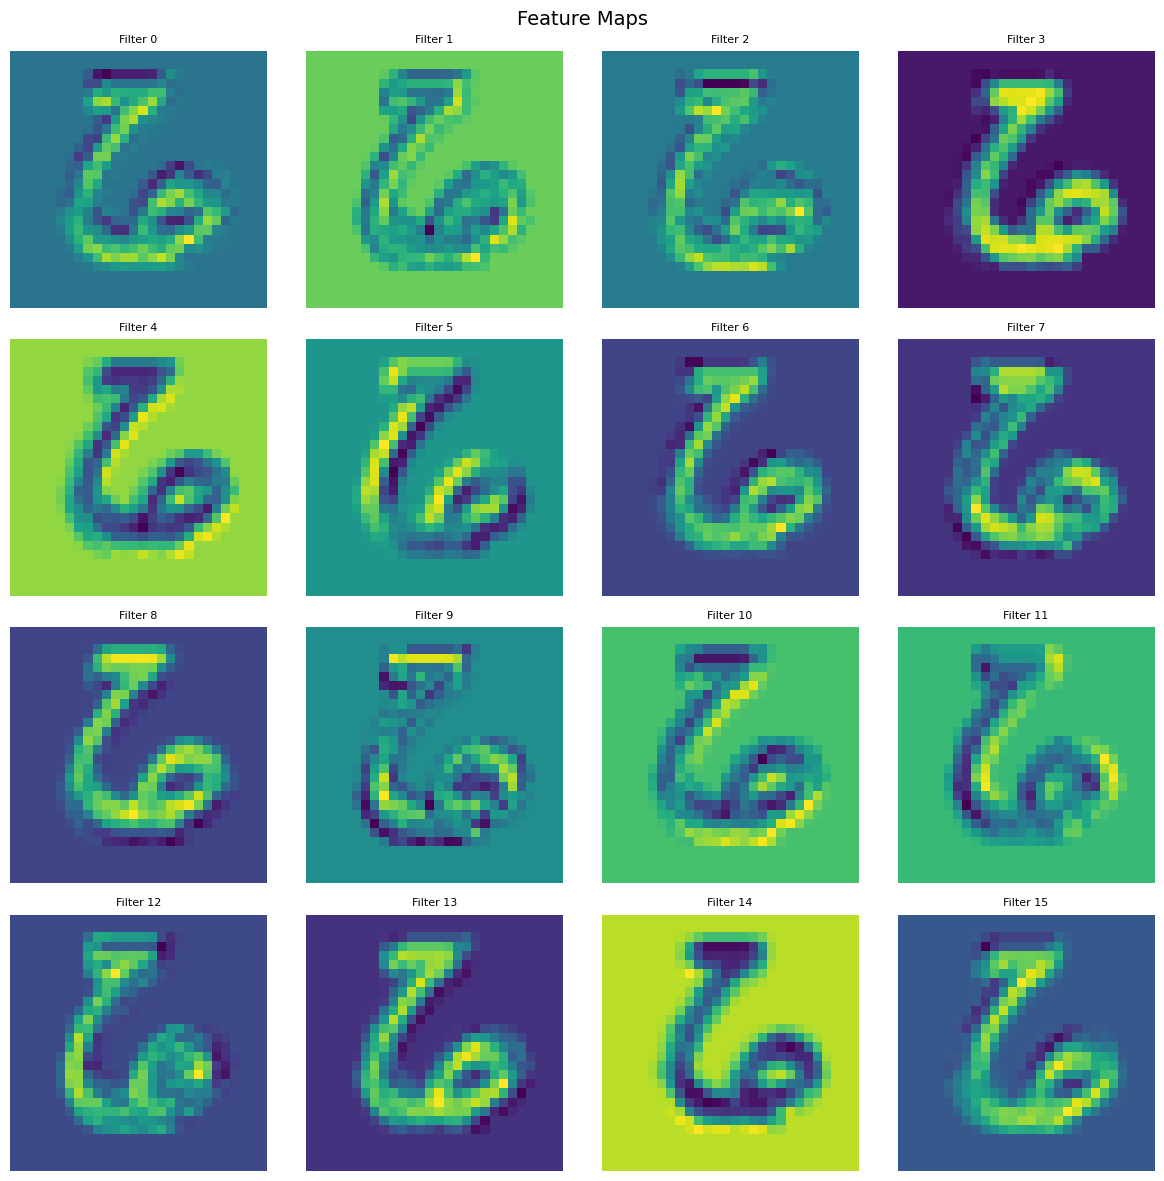

In [22]:
from src.visualizations import visualize_feature_maps

# Get feature maps for a sample
sample = X_test[0:1]
feature_maps = model.get_feature_maps(sample)

print(f"Number of conv layers: {len(feature_maps)}")
print(f"First layer feature map shape: {feature_maps[0]['feature_map'].shape}")

# Visualize
visualize_feature_maps(feature_maps[0]['feature_map'], max_maps=16, save_path='../visualizations/feature_maps.png')


## 6. Save Model


In [23]:
# Save trained model
model.save('../checkpoints/cnn_scratch.npz')
print("✓ Model saved!")


Model saved to ../checkpoints/cnn_scratch.npz
✓ Model saved!
